# Micro-Credit Defaulter Model

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

## About the data

1. label - Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}


2. msisdn	mobile number of user


3. aon - age on cellular network in days


4. daily_decr30 - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)


5. daily_decr90 - Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)


6. rental30 - Average main account balance over last 30 days


7. rental90 - Average main account balance over last 90 days


8. last_rech_date_ma - Number of days till last recharge of main account


9. last_rech_date_da - Number of days till last recharge of data account


10. last_rech_amt_ma - Amount of last recharge of main account (in Indonesian Rupiah)


11. cnt_ma_rech30 - Number of times main account got recharged in last 30 days


12. fr_ma_rech30 - Frequency of main account recharged in last 30 days


13. sumamnt_ma_rech30 - Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)


14. medianamnt_ma_rech300 - Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)


15. medianmarechprebal30 - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)


16. cnt_ma_rech90 - Number of times main account got recharged in last 90 days


17. fr_ma_rech90 - Frequency of main account recharged in last 90 days


18. sumamnt_ma_rech90 - Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)


19. medianamnt_ma_rech90 - Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)


20. medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)


21. cnt_da_rech30 - Number of times data account got recharged in last 30 days


22. fr_da_rech30 - Frequency of data account recharged in last 30 days


23. cnt_da_rech90 - Number of times data account got recharged in last 90 days


24. fr_da_rech90 - Frequency of data account recharged in last 90 days


25. cnt_loans30 - Number of loans taken by user in last 30 days


26. amnt_loans30 - Total amount of loans taken by user in last 30 days


27. maxamnt_loans30 - maximum amount of loan taken by the user in last 30 days


28. medianamnt_loans30 - Median of amounts of loan taken by the user in last 30 days


29. cnt_loans90 - Number of loans taken by user in last 90 days


30. amnt_loans90 - Total amount of loans taken by user in last 90 days


31. maxamnt_loans90 - maximum amount of loan taken by the user in last 90 days


32. medianamnt_loans90 - Median of amounts of loan taken by the user in last 90 days


33. payback30 - Average payback time in days over last 30 days


34. payback90 - Average payback time in days over last 90 days


35. pcircle	- telecom circle


36. pdate - date

#### Importing the needful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\Micro Credit Project\Data file.csv', index_col=0)
pd.options.display.max_columns = None
df.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.shape

(209593, 36)

The dataset has 36 attributes and a total of 2,09,593 of rows of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

- the data has 21 float type attributes


- 12 integer type attributes


- and 3 object type attributes 

## Data Engineering

#### Checking and deleting duplicate and one level data entries

In [5]:
# Deleting duplicate rows
df[df.duplicated(keep='first')].shape

(1, 36)

There existed one duplicate row of data which is now deleted.

In [6]:
temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        df.drop(col,inplace=True,axis=1)

df.shape

(209593, 35)

In [7]:
pd.options.display.max_columns = None
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [8]:
temp

['pcircle']

the attribute 'pcircle' has only one level of data hence it was deleted. 

#### Checking for missing values

In [9]:
#Again check for missing values
df.isnull().values.any()

False

The data does not have any missing values 

#### Exploring the target variable

In [10]:
df['label'].unique()

array([0, 1], dtype=int64)

In [11]:
print('label', df.label.value_counts().unique())

label [183431  26162]


#### Engineering the date column

In [12]:
# changing the Date column into actual date format

df['pdate'] = pd.to_datetime(df['pdate'])

In [13]:
#Splitting time stamp format data to day, month & year

df["day"]=df["pdate"].dt.day
df["month"]=df["pdate"].dt.month
df["year"]=df["pdate"].dt.year

In [14]:
df['year'].unique()

array([2016], dtype=int64)

In [15]:
df=df.drop(['year'], axis=1)

Dropped the year column because it contains jus one level of data

#### Checking the summary of the dataset

In [16]:
pd.set_option('display.max_columns', None)

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


### Observation

- The 'label' column is a target variable in the dataset {1:success, 0:failure}


- Maximum aon (age on cellular network in days) is 999860.755168 and Minimum aon is -48.000000.


- Maximum daily_decr30 (Daily amount spent from main account, averaged over last 30 days) is 265926.00 and Min Minimum daily_decr30 is -93.012667


- Maximum daily_decr90 (Daily amount spent from main account, averaged over last 90 days) is 320630.00 and Min Minimum daily_decr30 is -93.012667


- Maximum rental30 (Average main account balance over last 30 days) is 198926.110 and Minimum is -23737.140


- Maximum rental90 (Average main account balance over last 90 days) is 200148.110 and Minimum is -24720.580


- Maximum cnt_loans30 (Number of loans taken by user in last 30 days) is 50.00 and Minimum is 0


- Maximum amnt_loans30 (Total amount of loans taken by user in last 30 days) is 306.00 and Minimum is 0


- Maximum maxamnt_loans30 (maximum amount of loan taken by the user in last 30 days) is 99864.5608 and Minimum is 0


- Maximum medianamnt_loans30 (Median of amounts of loan taken by the user in last 30 days) is 3.0 and Minimum is 0


- Maximum cnt_loans90 (Number of loans taken by user in last 90 days) is 4997.51 and Minimum is 0


- Maximum amnt_loans90 (Total amount of loans taken by user in last 90 days) is 438.00 and Minimum is 0


- Maximum medianamnt_loans90 (maximum amount of loan taken by the user in last 90 days) is 3 and Minimum is 0


- Maximum payback30 (Median of amounts of loan taken by the user in last 90 days) is 171.50 and Minimum is 0


- Maximum payback30 (Median of amounts of loan taken by the user in last 90 days) is 171.50 and Minimum is 0


- The columns "aon, daily_decr30, daily_decr90, rental30, rental90	last_rech_date_ma	last_rech_date_da	last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90	cnt_loans30	amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90" are right skewed because mean is greater than median.


- The columns in dataset show that Outliers are present in the datset.

## Data Vizualization 

#### Univariate Analysis"

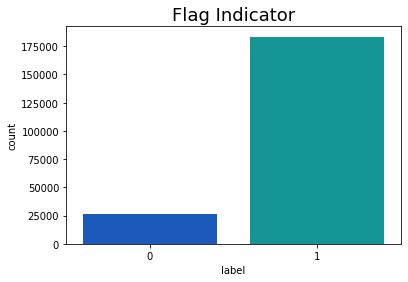

In [17]:
#Checking the number of Flag Indicator.

sns.countplot(x='label', data=df, palette='winter')
plt.title('Flag Indicator', fontsize=18)
plt.show()

Observation

1. Out of 209593 cases 183431 are success i.e. user paid back the credit amount within 5 days of issuing the loan.
2. Out of 209593 cases 26162 are failure cases i.e. failed to user pay back the credit amount within 5 days of issuing the loan.

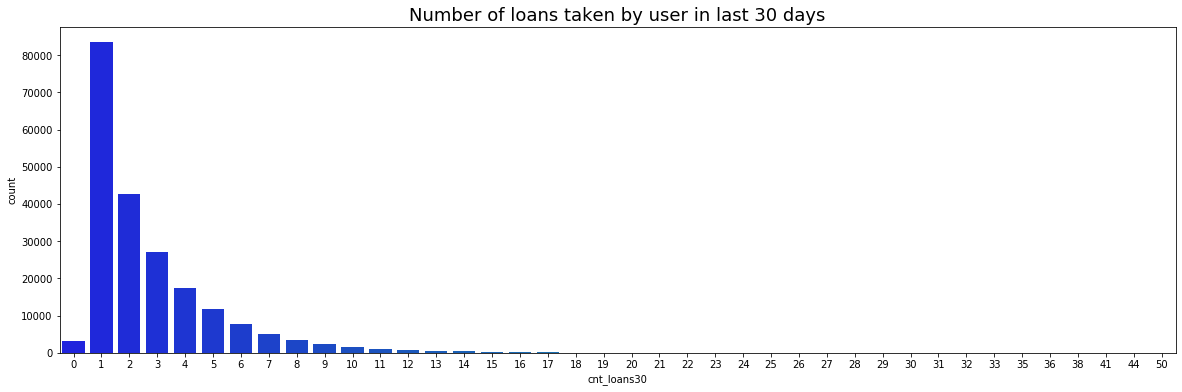

In [18]:
#Checking the Number of loans taken by user in last 30 days

plt.subplots(figsize=(20,6))
sns.countplot(x='cnt_loans30', data=df, palette='winter')
plt.title('Number of loans taken by user in last 30 days', fontsize=18)
plt.show()

- Most of the users only take loan once in a month
- Very few people take loan more than 5 times.

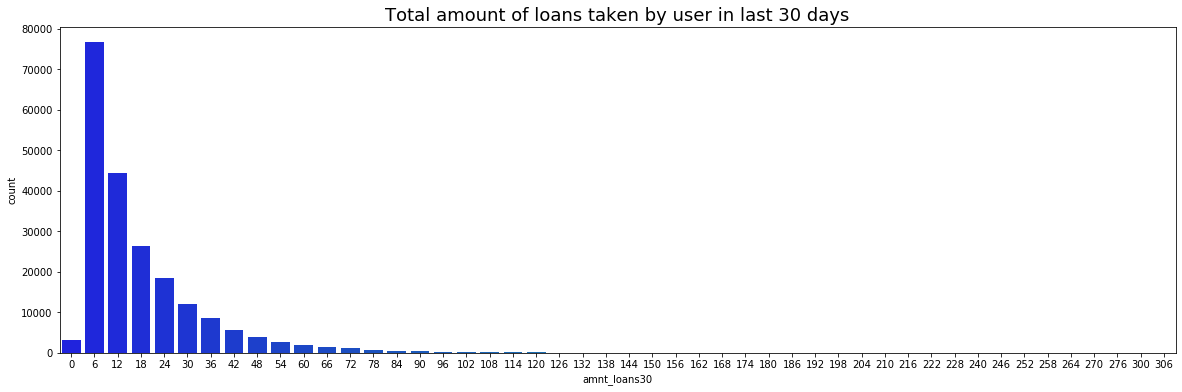

In [19]:
#Checking the Number of Total amount of loans taken by user in last 30 days

plt.subplots(figsize=(20,6))
sns.countplot(x='amnt_loans30', data=df, palette='winter')
plt.title('Total amount of loans taken by user in last 30 days', fontsize=18)
plt.show()

- Most of the users take 6 loans in a month at maximum

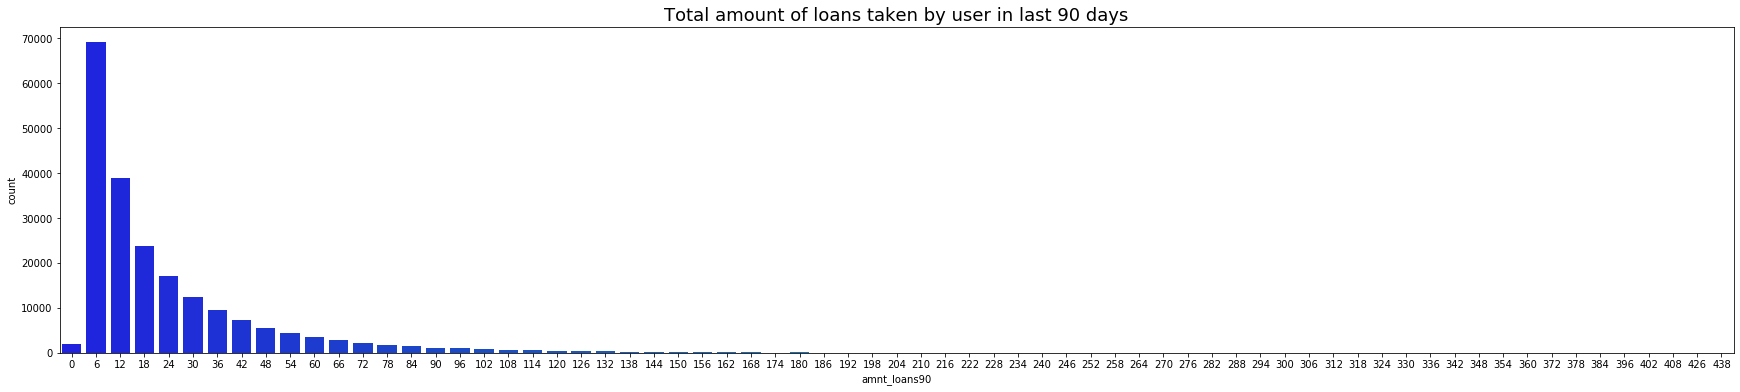

In [20]:
#Checking the Number of Total amount of loans taken by user in last 90 days

plt.subplots(figsize=(30, 6))
sns.countplot(x='amnt_loans90', data=df, palette='winter')
plt.title('Total amount of loans taken by user in last 90 days', fontsize=18)
plt.show()

- Most of the users take 6 loans in 3 months 

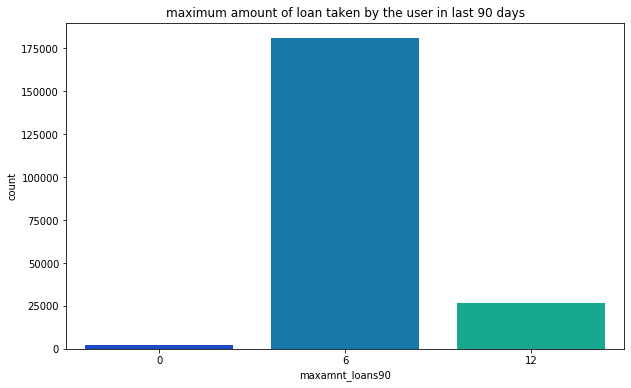

In [21]:
#Checking the maximum amount of loan taken by the user in last 90 days
plt.subplots(figsize=(10, 6))
sns.countplot(x='maxamnt_loans90', data=df, palette='winter')
plt.title('maximum amount of loan taken by the user in last 90 days', fontsize=12)
plt.show()

- Most of the users take 6 loans in 3 months 

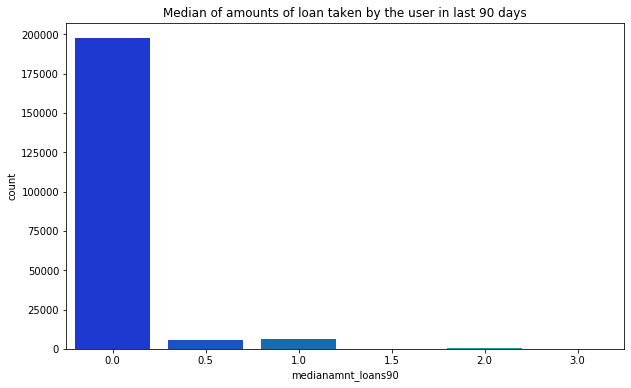

In [22]:
#Checking the Median of amounts of loan taken by the user in last 90 days

plt.subplots(figsize=(10, 6))
sns.countplot(x='medianamnt_loans90', data=df, palette='winter')
plt.title('Median of amounts of loan taken by the user in last 90 days', fontsize=12)
plt.show()

- Median of the amount of loans taken in 6 months is 0
- Very few users take loans

#### Bivariate Analysis

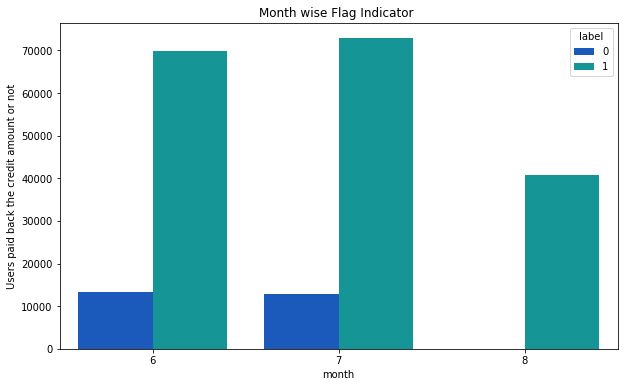

month  label
6      1        69893
       0        13261
7      1        72864
       0        12901
8      1        40674
Name: label, dtype: int64


In [23]:
#Month wise Flag Indicator i.e user paid back the credit amount within 5 days of issuing the loan

plt.subplots(figsize=(10, 6))
sns.countplot(x='month', hue ='label', data=df, palette='winter')
plt.title('Month wise Flag Indicator ')
plt.ylabel('Users paid back the credit amount or not')
plt.show()

print(df.groupby('month')['label'].value_counts())

- Most of the users pay back the loans on time
- July experieces maximum number of pay backs

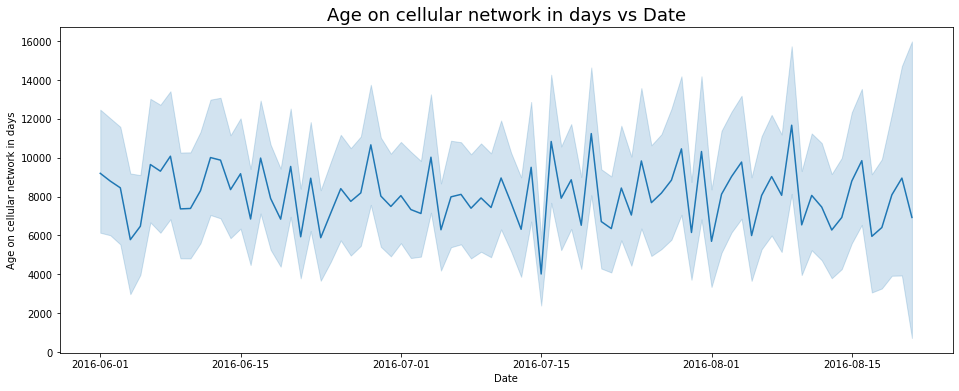

In [24]:
#using lineplot from seaborn to check age on cellular network in days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="aon", data=df)
plt.ylabel('Age on cellular network in days')
plt.xlabel('Date')
plt.title("Age on cellular network in days vs Date", fontsize=18)
plt.show()

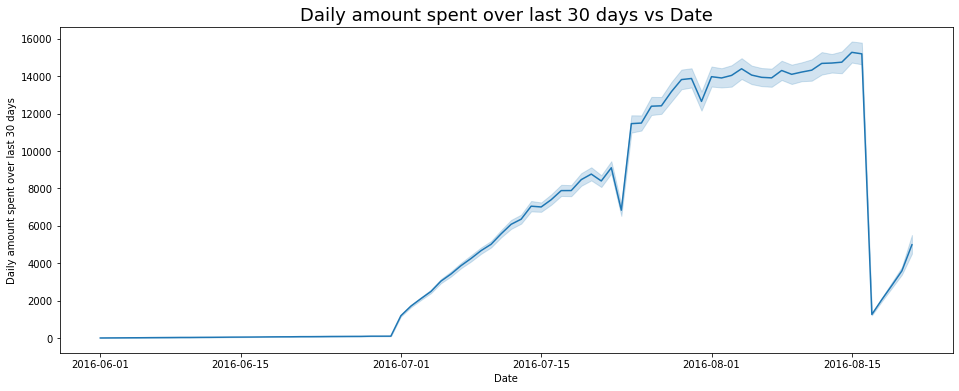

In [25]:
#using lineplot from seaborn to check Daily amount spent from main account, averaged over last 30 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="daily_decr30", data=df)
plt.ylabel('Daily amount spent over last 30 days')
plt.xlabel('Date')
plt.title("Daily amount spent over last 30 days vs Date", fontsize=18)
plt.show()

- Maximum amount was spent on 15th of August
- 7th of August experience a rise in the amount

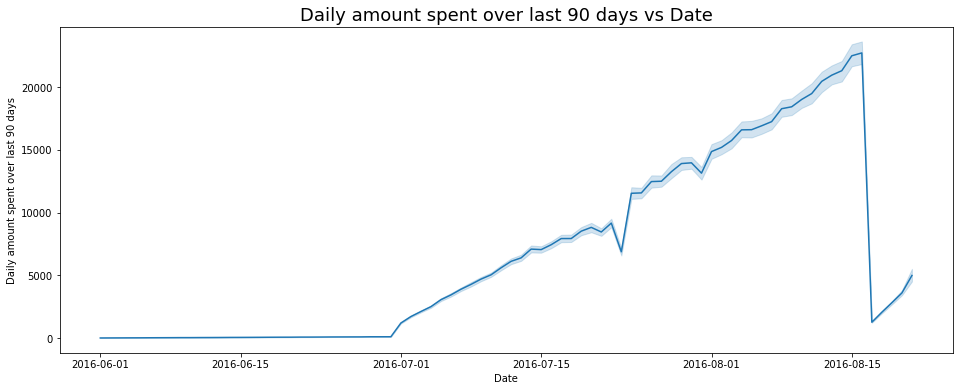

In [26]:
#using lineplot from seaborn to check Daily amount spent from main account, averaged over last 90 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="daily_decr90", data=df)
plt.ylabel('Daily amount spent over last 90 days')
plt.xlabel('Date')
plt.title("Daily amount spent over last 90 days vs Date", fontsize=18)
plt.show()

- Maximum amount was spent on 15th of August
- 7th of August experience a rise in the amount

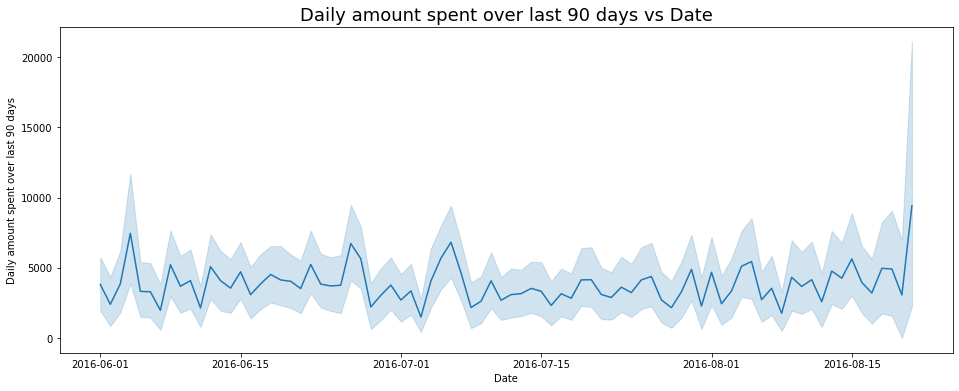

In [27]:
#using lineplot from seaborn to check Daily amount spent from main account, averaged over last 90 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="last_rech_date_ma", data=df)
plt.ylabel('Daily amount spent over last 90 days')
plt.xlabel('Date')
plt.title("Daily amount spent over last 90 days vs Date", fontsize=18)
plt.show()

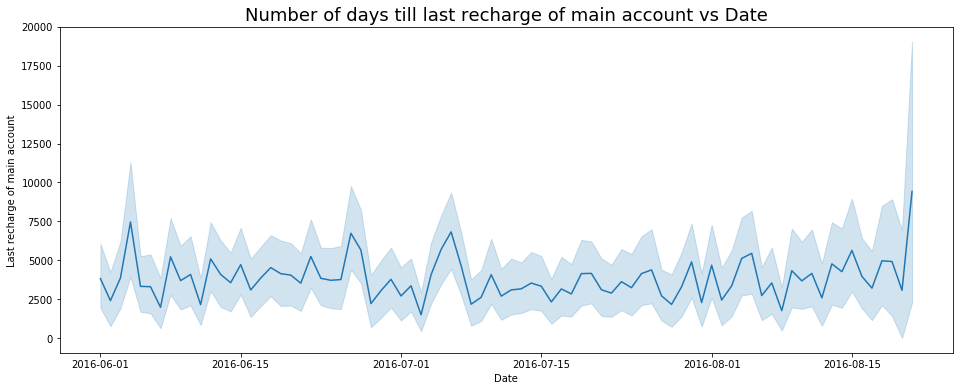

In [28]:
#using lineplot from seaborn to check Number of days till last recharge of main account vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="last_rech_date_ma", data=df)
plt.ylabel('Last recharge of main account')
plt.xlabel('Date')
plt.title("Number of days till last recharge of main account vs Date", fontsize=18)
plt.show()

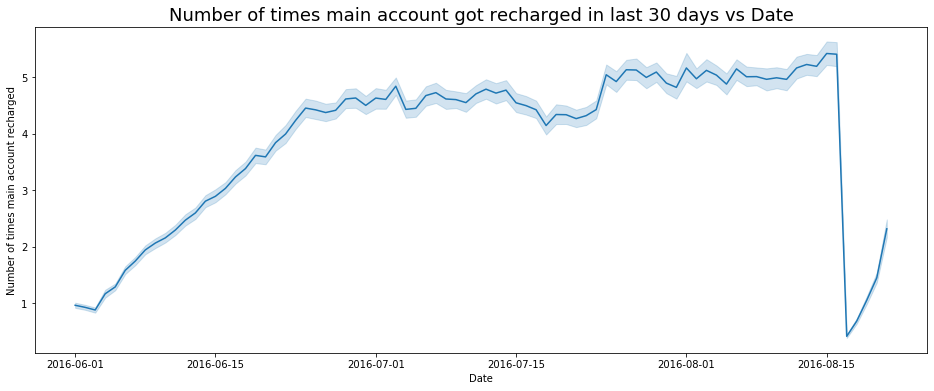

In [29]:
#using lineplot from seaborn to check Number of times main account got recharged in last 30 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="cnt_ma_rech30", data=df)
plt.ylabel('Number of times main account recharged')
plt.xlabel('Date')

plt.title("Number of times main account got recharged in last 30 days vs Date", fontsize=18)
plt.show()

- Most of the accounts recharge their accounts beggining from the middle of the months until the end.
- Recharges are very low during the initial days.

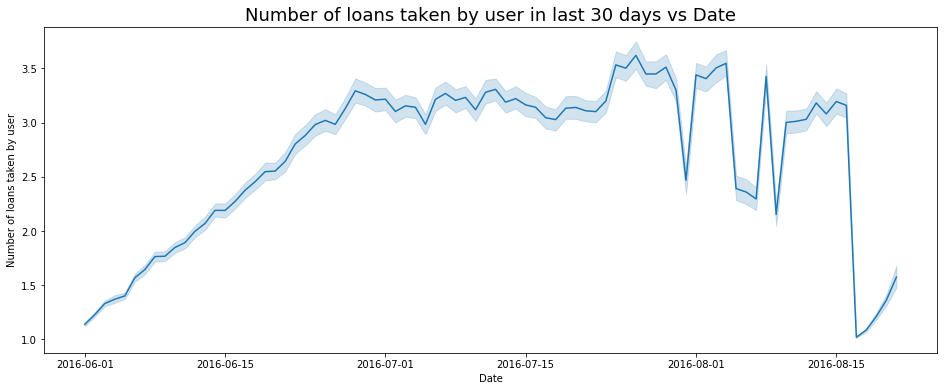

In [30]:
#using lineplot from seaborn to check Number of loans taken by user in last 30 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="cnt_loans30", data=df)
plt.ylabel('Number of loans taken by user')
plt.xlabel('Date')

plt.title("Number of loans taken by user in last 30 days vs Date", fontsize=18)
plt.show()

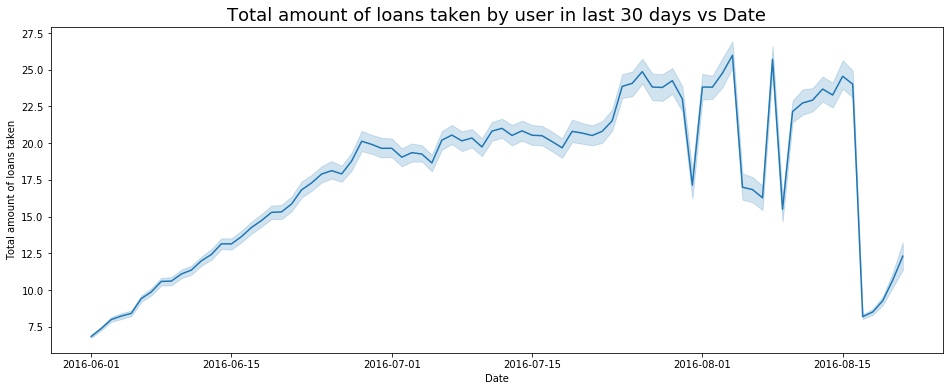

In [31]:
#using lineplot from seaborn to check Total amount of loans taken by user in last 30 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="amnt_loans30", data=df)
plt.ylabel('Total amount of loans taken')
plt.xlabel('Date')

plt.title("Total amount of loans taken by user in last 30 days vs Date", fontsize=18)
plt.show()

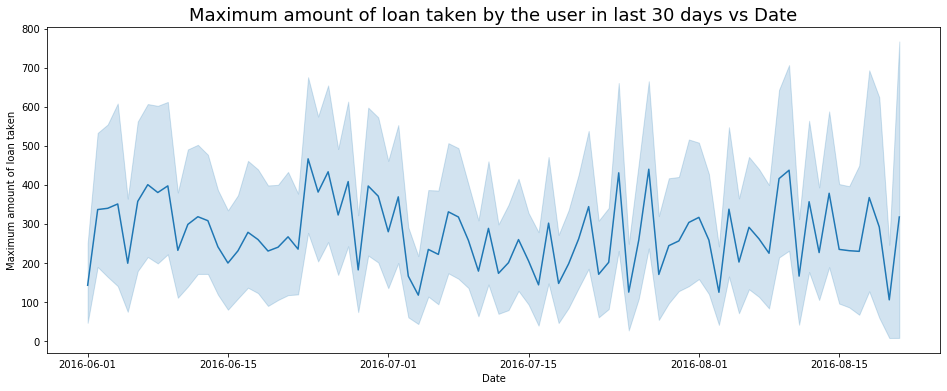

In [32]:
#using lineplot from seaborn to check maximum amount of loan taken by the user in last 30 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="maxamnt_loans30", data=df)
plt.ylabel('Maximum amount of loan taken')
plt.xlabel('Date')

plt.title("Maximum amount of loan taken by the user in last 30 days vs Date", fontsize=18)
plt.show()

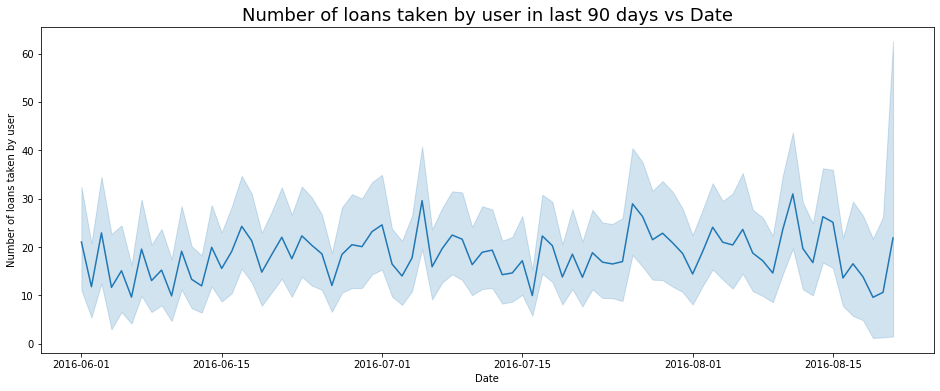

In [33]:
#using lineplot from seaborn to check Number of loans taken by user in last 90 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="cnt_loans90", data=df)
plt.ylabel('Number of loans taken by user')
plt.xlabel('Date')

plt.title("Number of loans taken by user in last 90 days vs Date", fontsize=18)
plt.show()

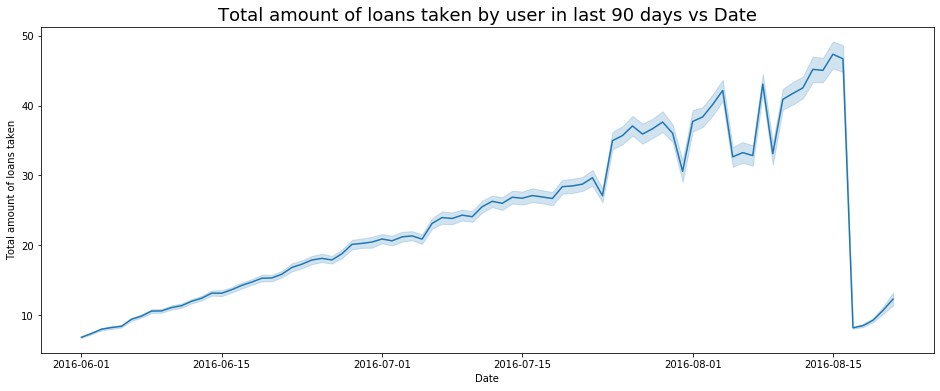

In [34]:
#using lineplot from seaborn to check Total amount of loans taken by user in last 90 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="amnt_loans90", data=df)
plt.ylabel('Total amount of loans taken')
plt.xlabel('Date')

plt.title("Total amount of loans taken by user in last 90 days vs Date", fontsize=18)
plt.show()

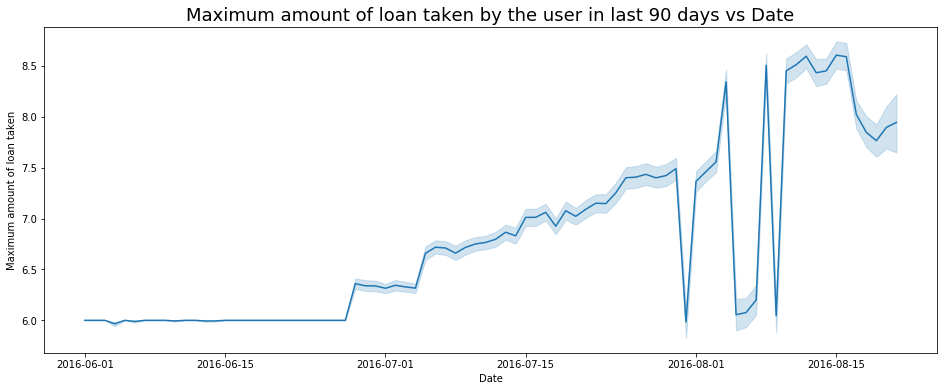

In [35]:
#using lineplot from seaborn to check maximum amount of loan taken by the user in last 90 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="maxamnt_loans90", data=df)
plt.ylabel('Maximum amount of loan taken')
plt.xlabel('Date')

plt.title("Maximum amount of loan taken by the user in last 90 days vs Date", fontsize=18)
plt.show()

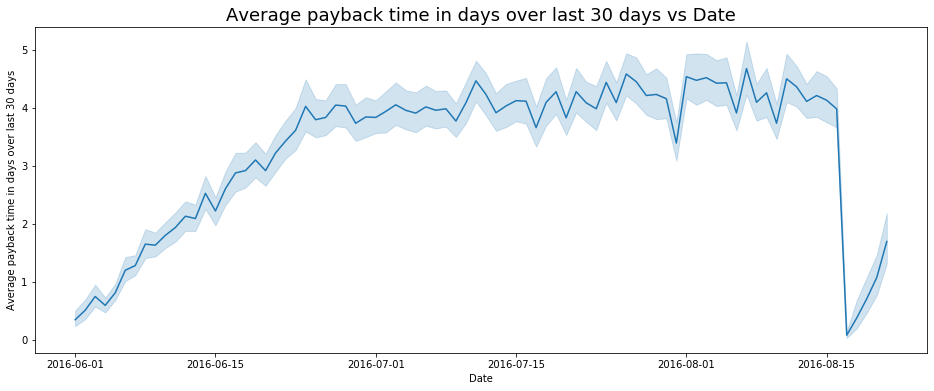

In [36]:
#using lineplot from seaborn to check Average payback time in days over last 30 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="payback30", data=df)
plt.ylabel('Average payback time in days over last 30 days')
plt.xlabel('Date')

plt.title("Average payback time in days over last 30 days vs Date", fontsize=18)
plt.show()

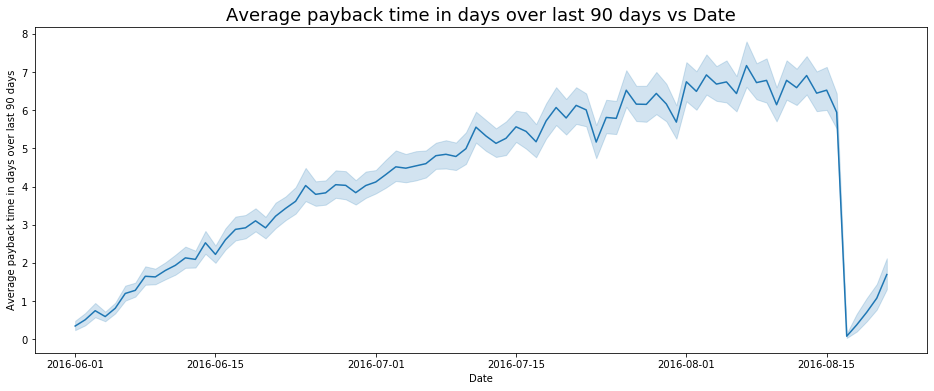

In [37]:
#using lineplot from seaborn to check Average payback time in days over last 90 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="pdate", y="payback90", data=df)
plt.ylabel('Average payback time in days over last 90 days')
plt.xlabel('Date')

plt.title("Average payback time in days over last 90 days vs Date", fontsize=18)
plt.show()

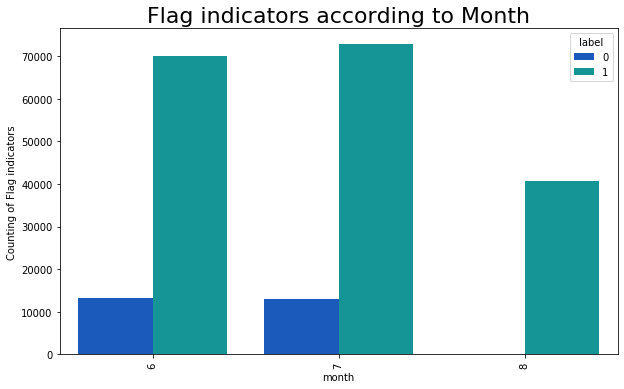

In [38]:
#Flag indicators according to Month

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='label', data=df, palette='winter')
plt.title("Flag indicators according to Month", fontsize=22)
plt.ylabel("Counting of Flag indicators")
plt.xticks(rotation='vertical')
plt.show()

### Corelation

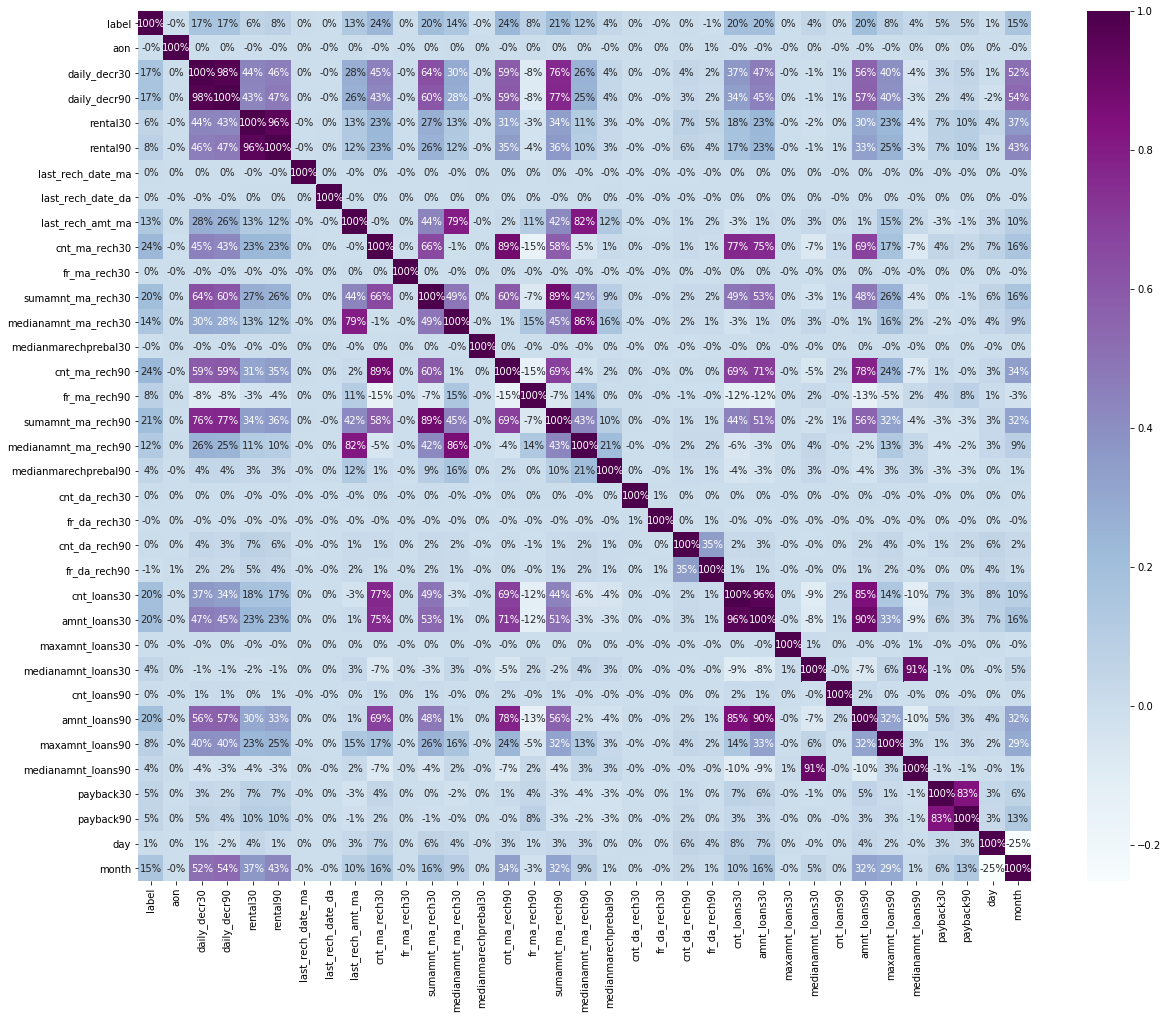

In [39]:
#Heatmap
df_cor=df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(df_cor, annot=True, fmt='.0%', cmap='BuPu')
plt.show()

### Observation

- In the Micro Finance Service dataset the correlation graph shows that "daily_decr30, daily_decr90" columns are highly correlated with each other.


- The columns "cnt_loans30, amnt_loans30" are highly correlated with each other.


- The columns "rental30, rental90" are highly correlated with each other.


- The columns "amnt_loans30, amnt_loans90" are highly correlated with each other.


- The columns "medianamnt_loans30, medianamnt_loans90" are highly correlated with each other.


- The columns "payback30, payback90" are highly correlated with each other. 

The attributes 'amnt_loans30', 'rental30', 'medianamnt_loans30' and 'payback30' should be dropped because keeping them would result in overfitting.

However it is important to check their importance while calculating the target column

Text(0.5, 1.0, 'Correlation with label variable')

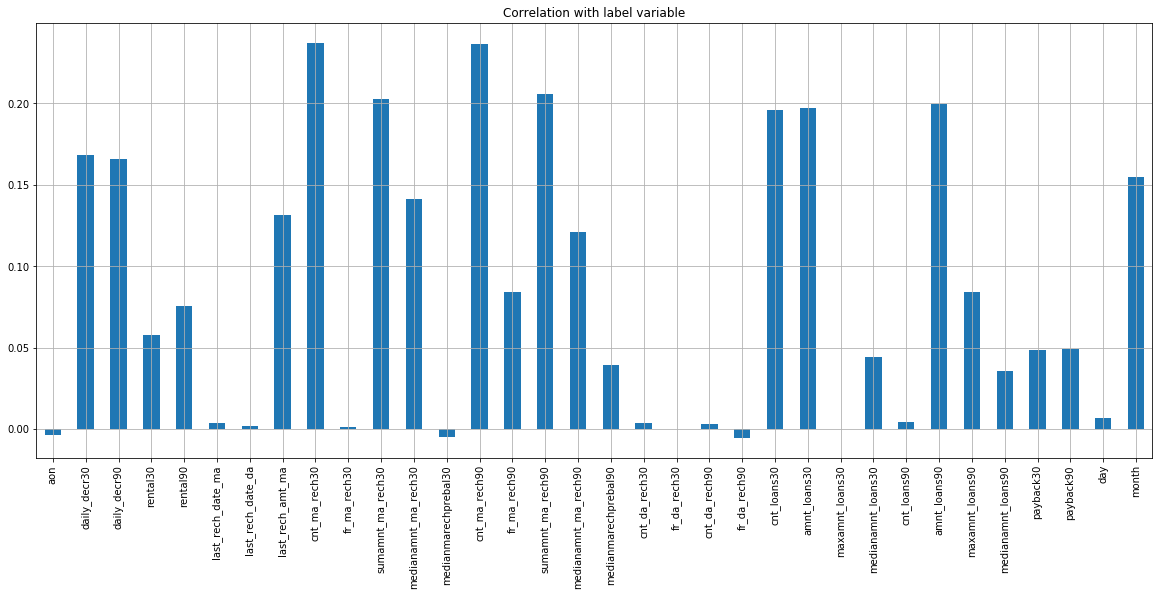

In [40]:
#Correlation with target column

plt.figure(figsize=(20, 8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar', grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with label variable")

The columns 'rental30', 'medianamnt_loans90' and 'payback30' do not contribute to the target variable and hence they can be dropped

In [41]:
df=df.drop(['medianamnt_loans30','rental30','payback30'], axis=1)

In [42]:
#Now dropping the unnecessary columns from the dataset which do not provide any insights to the dataset. 
#Dropping msisdn column as it is just working as ID number/unique telecom number which do bot have any effect on the dataset.
df=df.drop(['msisdn'], axis=1)

#Dropping the pdate column as we have already converted the pdate into datetime64 and added date and month seperately to the dataset.
df=df.drop(['pdate'], axis=1)

df.head()

,label,aon,daily_decr30,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,day,month
1,0,272.0,3055.050000,3065.150000,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,2.0,12,6,0.0,29.000000,20,7
2,1,712.0,12122.000000,12124.750000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,1.0,12,12,0.0,0.000000,10,8
3,1,535.0,1398.000000,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,1.0,6,6,0.0,0.000000,19,8
4,1,241.0,21.228000,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,2.0,12,6,0.0,0.000000,6,6
5,1,947.0,150.619333,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,7.0,42,6,0.0,2.333333,22,6


#### Checking for outliers

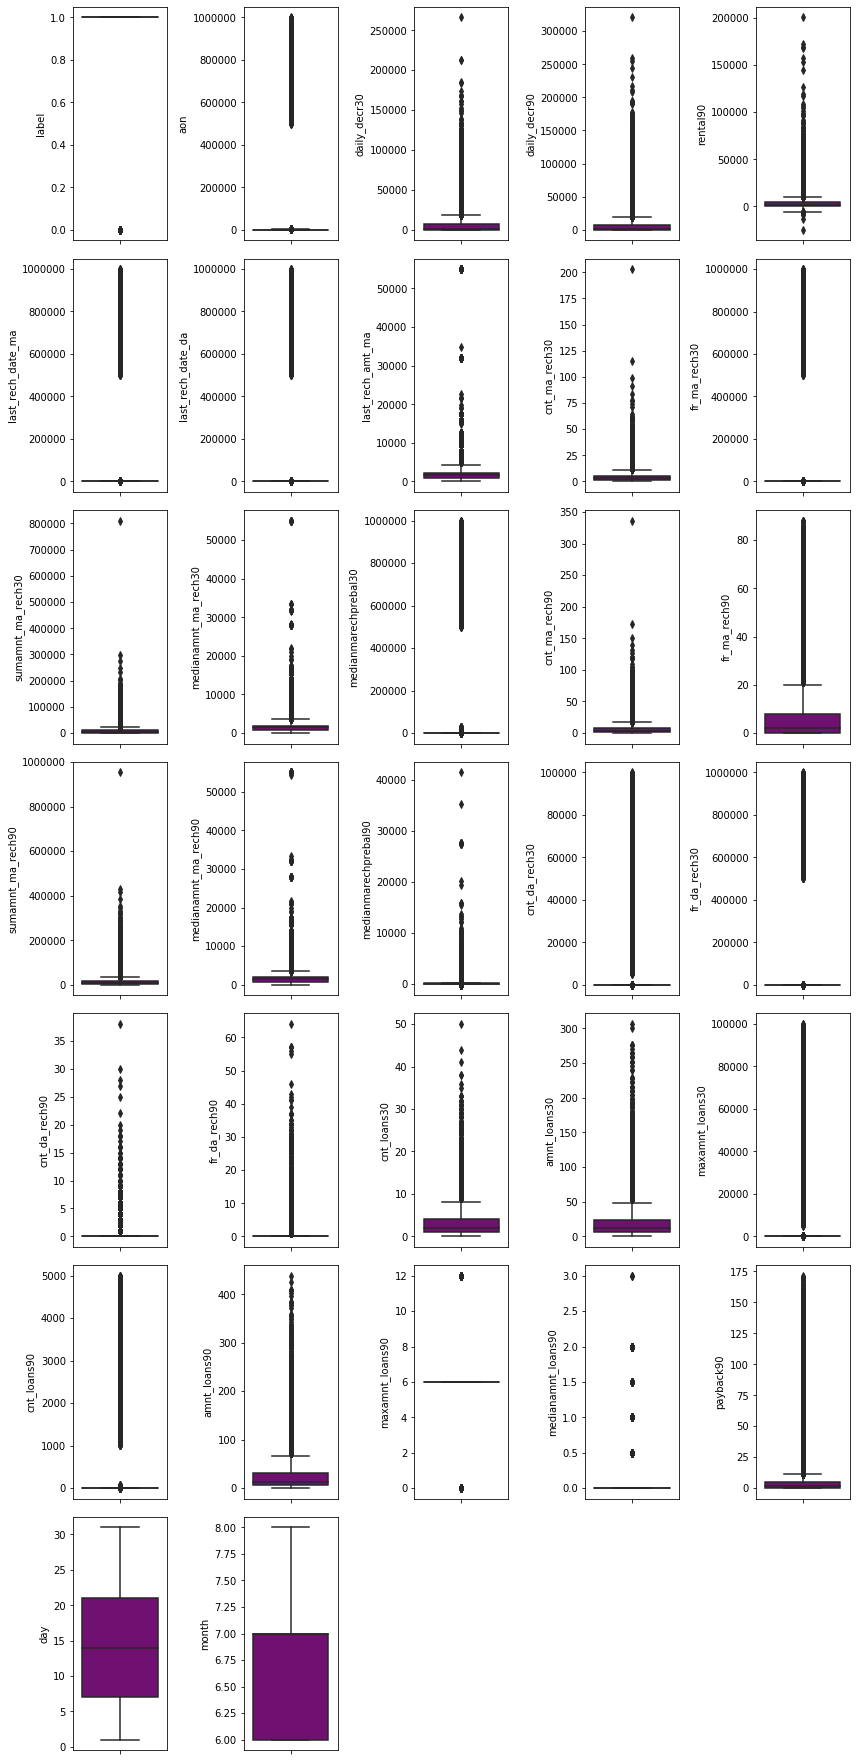

In [43]:
collist=df.columns.values
ncol=5
nrow=10

plt.figure(figsize=(12, 35))
for i in range(0, len(collist)):
    plt.subplot(nrow, ncol, i+1)
    sns.boxplot(df[collist[i]], color='purple', orient='v')
    plt.tight_layout()

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 2.39409346, 0.6637208 ,
        0.27336037],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.41923266, 0.52127058,
        1.62209905],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.41923266, 0.54522166,
        1.62209905],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.04735622, 1.73021304,
        0.27336037],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.59938541, 1.25621649,
        0.27336037],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.41923266, 0.87676799,
        0.27336037]])

In [45]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209581, 209586, 209587], dtype=int64), array([14, 14, 29, ...,  3, 26, 28], dtype=int64))


In [46]:
df_new=df[(z<3).all(axis=1)]

In [47]:
print(df.shape, '\t', df_new.shape)

(209593, 32) 	 (163712, 32)


In [48]:
df=df_new
print(df.shape)

(163712, 32)


#### Checking for skewness

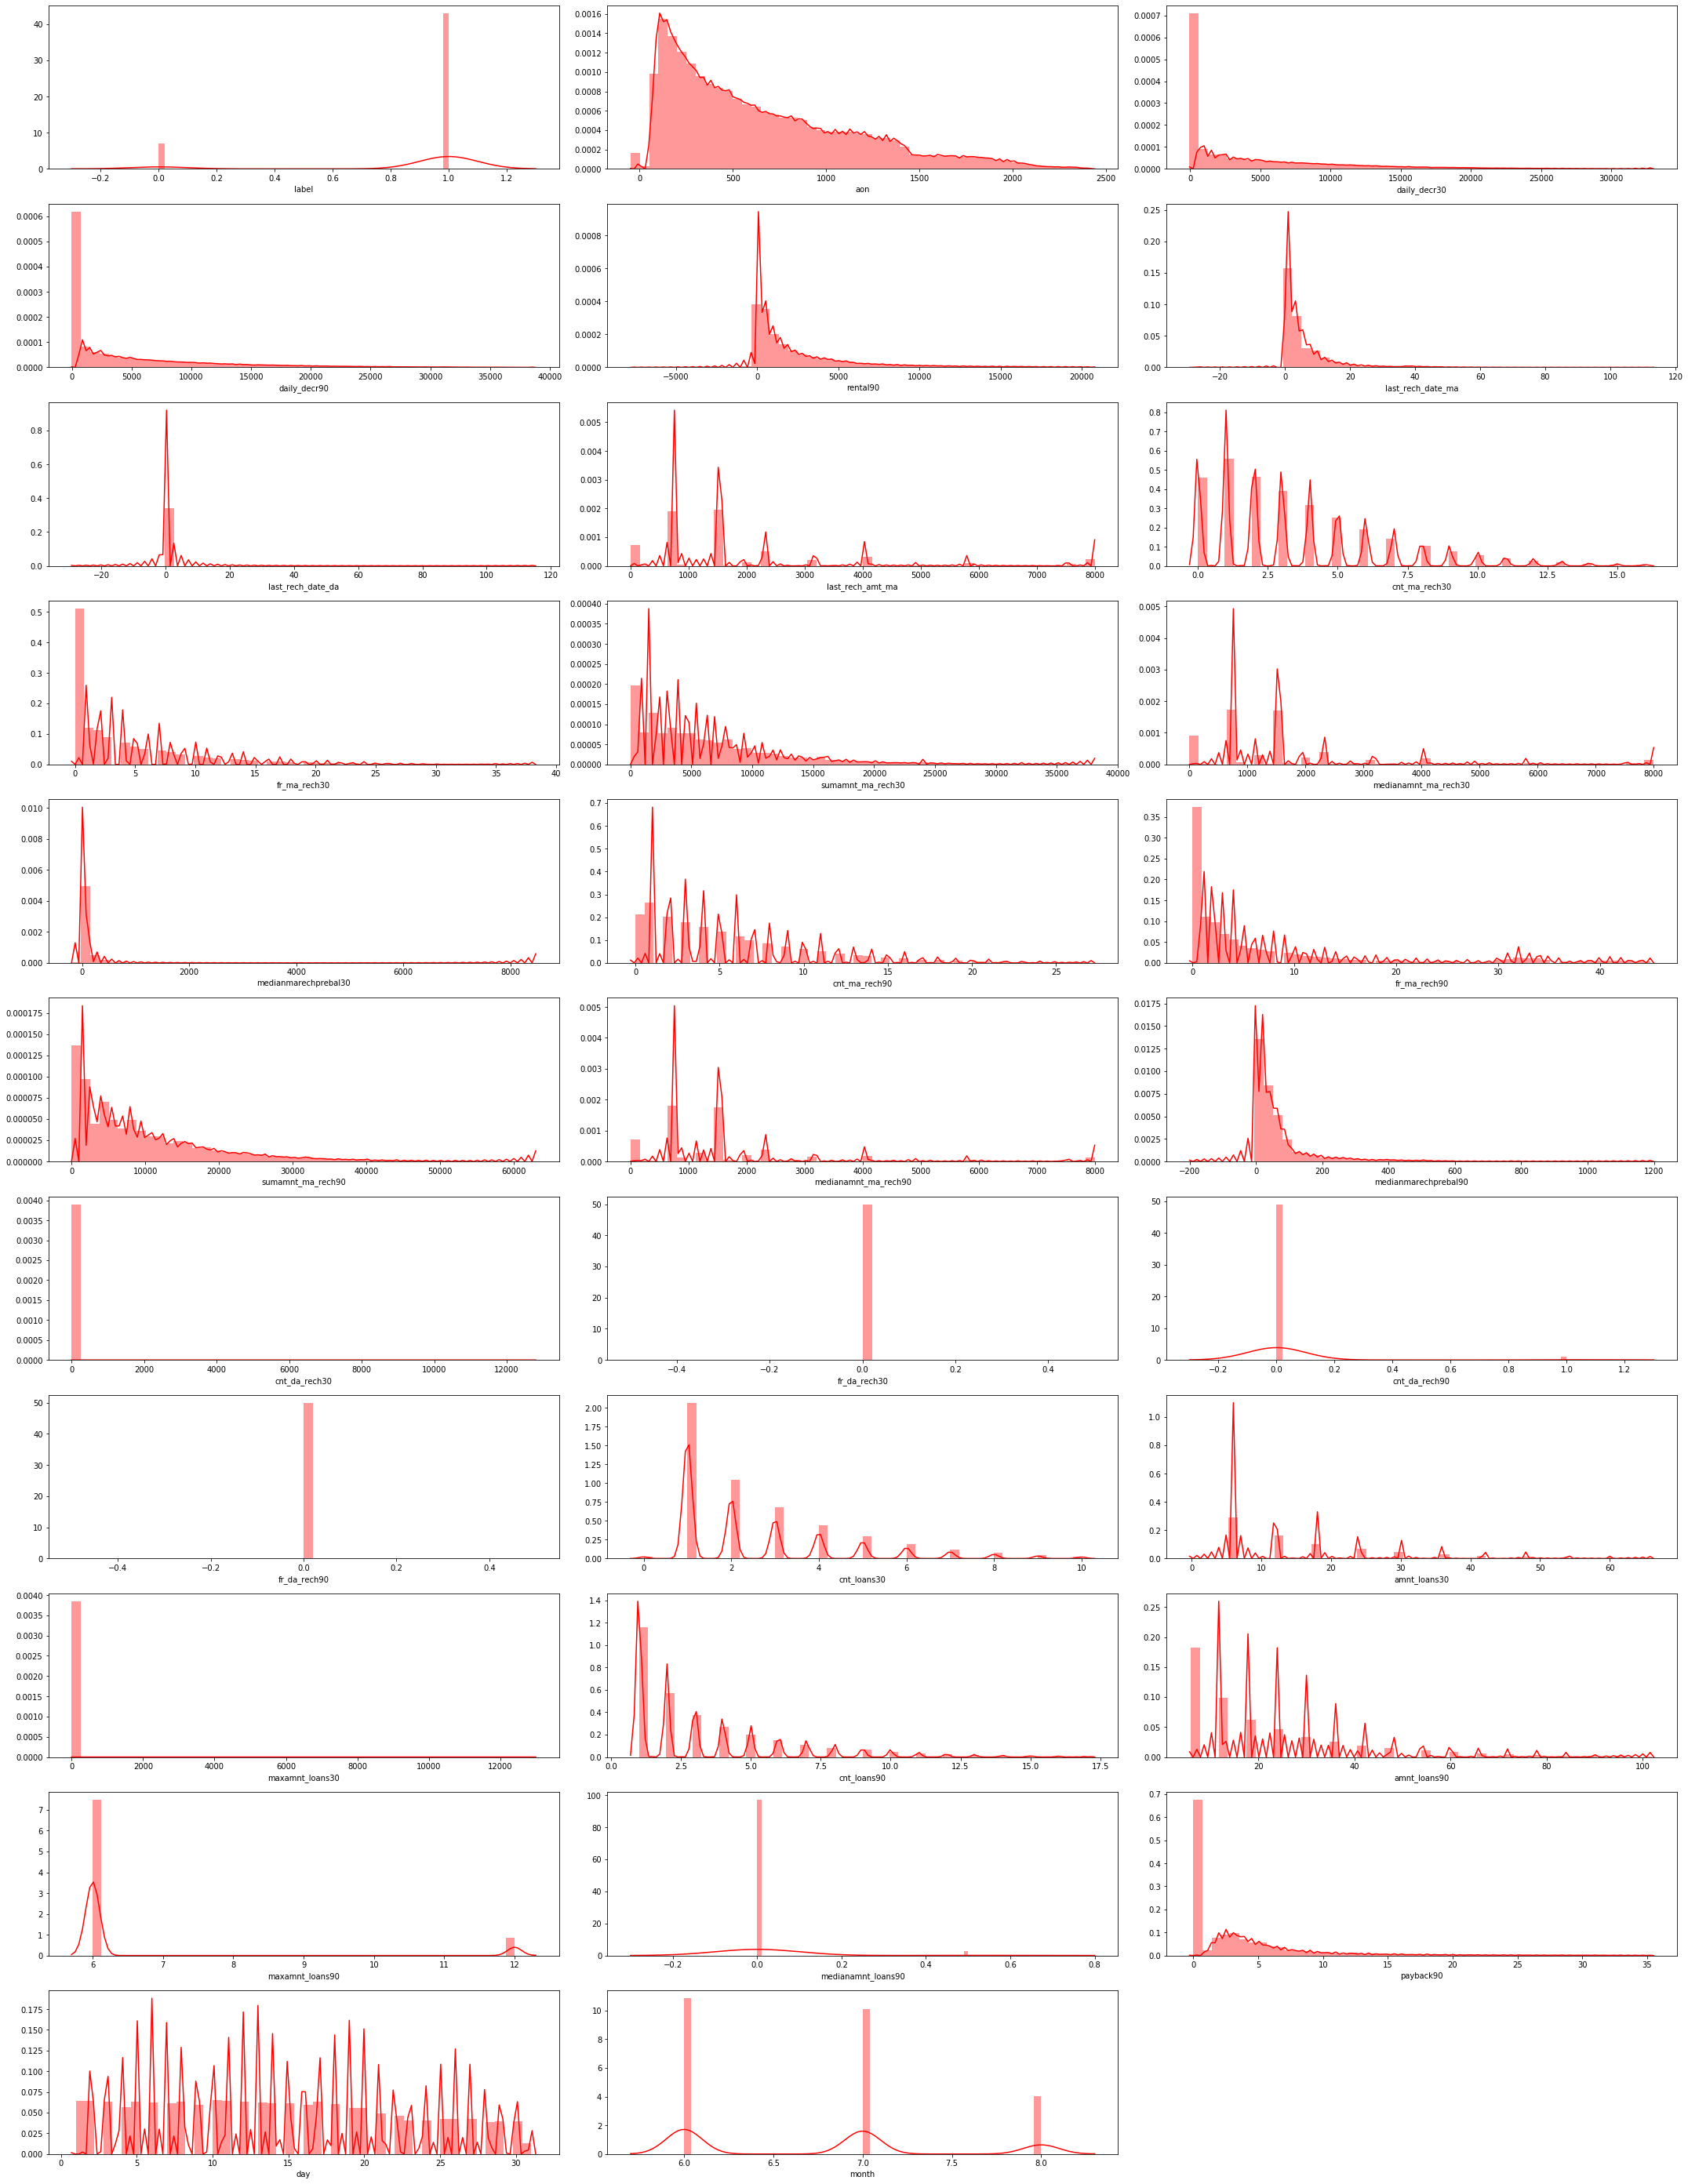

In [49]:
collist=df.columns.values
ncol=3
nrow=20

plt.figure(figsize=(30, 70))
for i in range(0, len(collist)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(df[collist[i]], kde_kws={'bw': 0.1}, color='red')
    plt.tight_layout()

In [50]:
#Treating skewness via square root method

import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

In [51]:
#splitting the data into input and output variable

x=df.drop(columns=['label'], axis=1)
x.head()

,aon,daily_decr30,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,day,month
1,1.864265,14.510179,14.526152,6.383568,1.080060,0.0,2.260152,1.080060,2.758924,2.441099,2.260152,1.957434,1.080060,2.758924,14.546423,2.260152,1.957434,0.0,0.0,0.0,0,1.259921,2.289428,1.817121,1.259921,2.289428,1.817121,0.0,3.072317,20,7
2,2.074637,22.971610,22.973347,15.454616,1.394951,0.0,2.618487,1.000000,0.000000,2.618487,2.618487,3.937357,1.000000,0.000000,17.953584,2.618487,3.937357,0.0,0.0,0.0,0,1.000000,2.289428,2.289428,1.000000,2.289428,2.289428,0.0,0.000000,10,8
3,2.009789,11.181560,11.181560,9.655359,1.129831,0.0,2.260152,1.000000,0.000000,2.260152,2.260152,4.047761,1.000000,0.000000,11.545503,2.260152,4.047761,0.0,0.0,0.0,0,1.000000,1.817121,1.817121,1.000000,1.817121,1.817121,0.0,0.000000,19,8
4,1.839368,2.768873,2.768873,5.422267,1.510769,0.0,2.141438,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.820117,2.141438,1.357209,0.0,0.0,0.0,0,1.259921,2.289428,1.817121,1.259921,2.289428,1.817121,0.0,0.000000,6,6
5,2.141438,5.320595,5.320595,10.319359,1.166529,0.0,2.364361,1.241366,1.259921,3.005814,2.364361,3.072317,1.259921,1.259921,28.641646,2.423878,3.271066,0.0,0.0,0.0,0,1.912931,3.476027,1.817121,1.912931,3.476027,1.817121,0.0,1.326352,22,6


In [52]:
y=df['label']
y.head()

1    0.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: label, dtype: float64

In [53]:
#Checking the shape of input and target variable

print(x.shape, '\t\t', y.shape)

(163712, 31) 		 (163712,)


# Model Training

In [54]:
#scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [55]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42, stratify=y)

In [56]:
#Checking the shape

print(x_train.shape, '\t\t', x_test.shape)

(130969, 31) 		 (32743, 31)


In [57]:
#Checking the shape

print(y_train.shape, '\t\t', y_test.shape)

(130969,) 		 (32743,)


In [58]:
#Importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [59]:
#All Algorithm by using for loop

model=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), 
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)  
    predm=m.predict(x_test)
    print('Accuracy score of' , m, 'is:')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print('*********************************************************************')
    print('\n')

Accuracy score of LogisticRegression() is:
0.8728583208624744
[[  950  3573]
 [  590 27630]]
              precision    recall  f1-score   support

         0.0       0.62      0.21      0.31      4523
         1.0       0.89      0.98      0.93     28220

    accuracy                           0.87     32743
   macro avg       0.75      0.59      0.62     32743
weighted avg       0.85      0.87      0.84     32743

*********************************************************************


Accuracy score of GaussianNB() is:
0.7988272302476865
[[ 2997  1526]
 [ 5061 23159]]
              precision    recall  f1-score   support

         0.0       0.37      0.66      0.48      4523
         1.0       0.94      0.82      0.88     28220

    accuracy                           0.80     32743
   macro avg       0.66      0.74      0.68     32743
weighted avg       0.86      0.80      0.82     32743

*********************************************************************


Accuracy score of Decisi

# Cross Validation

In [60]:
#Cross validating the models

models=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), 
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y, cv=5, scoring='accuracy')
    print("Model:", m)
    print("Score:", score)
    print("Mean Score:", score.mean())
    print("Standard deviation:", score.std())
    print('\n')
    print('*********************************************************************')
    print('\n')

Model: LogisticRegression()
Score: [0.87249183 0.87175885 0.8722436  0.87172439 0.87453424]
Mean Score: 0.8725505818173629
Standard deviation: 0.0010336353611630753


*********************************************************************


Model: GaussianNB()
Score: [0.80191186 0.80078185 0.79762996 0.80050089 0.80337182]
Mean Score: 0.8008392725324933
Standard deviation: 0.0018964038633763102


*********************************************************************


Model: DecisionTreeClassifier()
Score: [0.8784473  0.87774486 0.87615295 0.88000122 0.8782298 ]
Mean Score: 0.8781152269735312
Standard deviation: 0.00123839121644337


*********************************************************************


Model: RandomForestClassifier()
Score: [0.91787558 0.91585988 0.91552135 0.91720115 0.91671248]
Mean Score: 0.9166340862778393
Standard deviation: 0.0008609977225621468


*********************************************************************


Model: AdaBoostClassifier()
Score: [0.90599517

# Confusion Matrix

The top 3 performing models are: 
- RandomForestClassifier


- GradientBoostingClassifier


- ExtraTreesClassifier 

Model: RandomForestClassifier()
[[ 2418  2105]
 [  672 27548]]


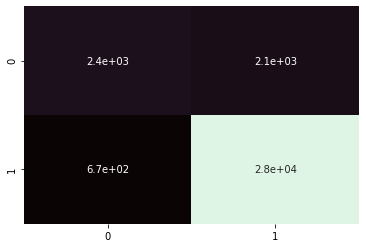



*********************************************************************


Model: GradientBoostingClassifier()
[[ 2418  2105]
 [  672 27548]]


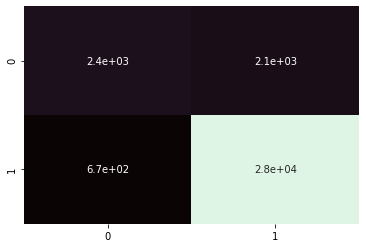



*********************************************************************


Model: ExtraTreesClassifier()
[[ 2418  2105]
 [  672 27548]]


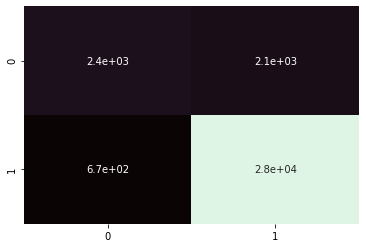



*********************************************************************




In [61]:
 #Plotting confusion matrix for models
model=[RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier()]

for m in model:
    print("Model:", m)
    cm=confusion_matrix(y_test, predm)
    sns.heatmap(cm, annot=True, cbar=False, cmap='mako')
    print(confusion_matrix(y_test, predm))
    plt.show()
    print('\n')
    print('*********************************************************************')
    print('\n')

 # Using Grid SearchCV to find out parameter

In [62]:
x1=x
y1=y

In [63]:
#Using gridsearch CV to find out best parameters in RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':('gini', 'entropy'), 'n_estimators':range(80, 100)}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc, parameters)
clf.fit(x1, y1)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 95}


In [ ]:
#Using gridsearch CV to find out best parameters in Gradient Boosting Classifier

parameters={'criterion':['friedman_mse', 'mse', 'mae'], 'n_estimators':[100, 200, 300]}

gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc, parameters)
clf.fit(x1, y1)
print(clf.best_params_)

In [ ]:
#Using gridsearch CV to find out best parameters in Extra Trees Classifier

parameters={'criterion':('gini', 'entropy'), 'n_estimators':range(80, 100)}
etc=ExtraTreesClassifier()

clf=GridSearchCV(etc, parameters)
clf.fit(x1, y1)
print(clf.best_params_)

# Predictive Modeling

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [63]:
GBC=GradientBoostingClassifier(criterion='mse', random_state=42, learning_rate=0.1, n_estimators=200, max_depth=4)
RFC=RandomForestClassifier(criterion='entropy', n_estimators=95)
ETC=ExtraTreesClassifier(criterion='entropy', n_estimators=81)

In [64]:
models=[]
models.append(('GradientBoostingClassifier', GBC))
models.append(('RandomForestClassifier', RFC))
models.append(('ExtraTreesClassifier', ETC))

********************************* GradientBoostingClassifier ************************


GradientBoostingClassifier(criterion='mse', max_depth=4, n_estimators=200,
                           random_state=42)


Accuracy Score: 0.9182726078856549


Cross Val Score: 0.9185887433871865


ROC_AUC_Score 0.7740782523782297


[[ 2600  1923]
 [  753 27467]]


Classification_report 
               precision    recall  f1-score   support

         0.0       0.78      0.57      0.66      4523
         1.0       0.93      0.97      0.95     28220

    accuracy                           0.92     32743
   macro avg       0.85      0.77      0.81     32743
weighted avg       0.91      0.92      0.91     32743



AxesSubplot(0.125,0.808774;0.775x0.0712264)



********************************* RandomForestClassifier ************************


RandomForestClassifier(criterion='entropy', n_estimators=95)


Accuracy Score: 0.9164401551476652


Cross Val Score: 0.9162248299181697


ROC_AUC_Score 0.7593694359

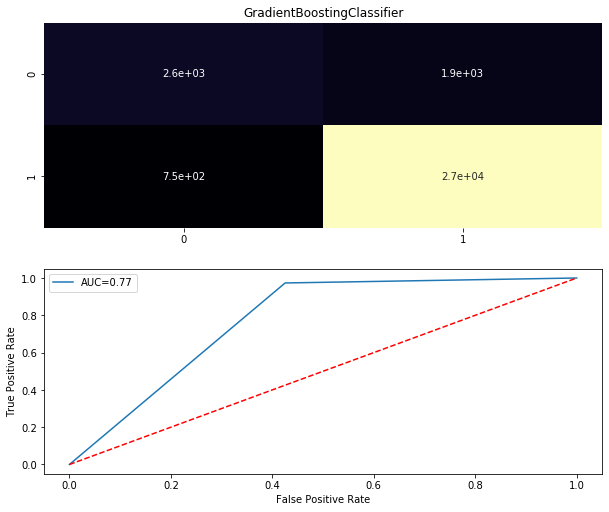

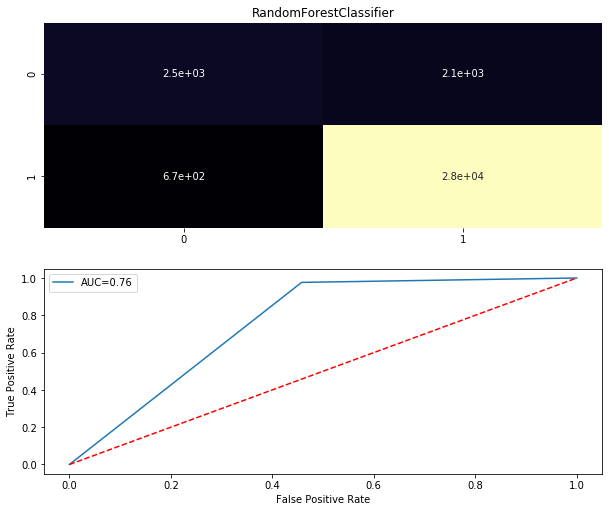

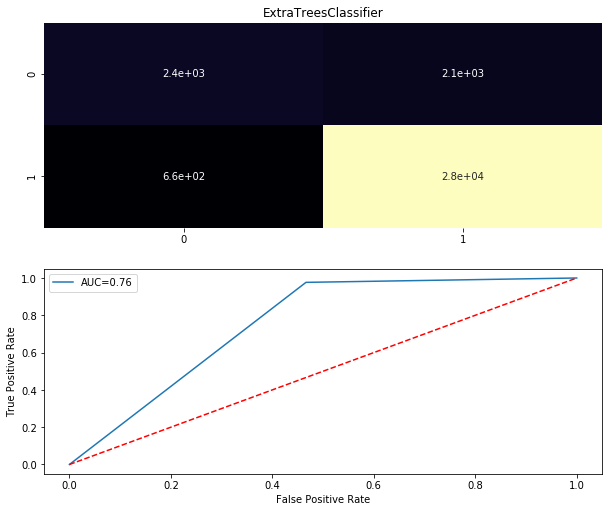

In [65]:
Model=[]
Score=[]
CVS=[]
ROC_Score=[]

for name, model in models:
    print('*********************************', name, '************************')
    print('\n')
    Model.append(name)
    
    model.fit(x_train, y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test, pred)
    print('Accuracy Score:', AS)
    Score.append(AS*100)
    print('\n')
    
    #Cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Val Score:', cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_SCORE
    false_positive_rate, true_positive_rate, threshold=roc_curve(y_test, pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('ROC_AUC_Score', roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
    
    #Confusion Matrix
    cm=confusion_matrix(y_test, pred)
    print(cm)
    print('\n')
    
    #Classification report
    print('Classification_report \n', classification_report(y_test, pred))
    print('\n')
    
    #Confusionmatrix via Heatmap
    plt.figure(figsize=(10, 40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm, annot=True, cbar=False, cmap='magma'))
    plt.subplot(912)
    
    #ROC Curve
    plt.plot(false_positive_rate, true_positive_rate, label='AUC=%.2f'%roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.legend(loc='Lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [66]:
#Storing the results in dataframe

result=pd.DataFrame({'Model': models, 'Accuracy_Score': Score, 'Cross_Val_Score':CVS, 'ROC_AUC_Score': ROC_Score})

result

,Model,Accuracy_Score,Cross_Val_Score,ROC_AUC_Score
0,"(GradientBoostingClassifier, ([DecisionTreeReg...",91.827261,91.858874,77.407825
1,"(RandomForestClassifier, (DecisionTreeClassifi...",91.644016,91.622483,75.936944
2,"(ExtraTreesClassifier, (ExtraTreeClassifier(cr...",91.540177,91.474051,75.514673


# Prediction

In [ ]:
#saving this model Gradient Boosting Classifier as finalised model

from sklearn.externals import joblib

#saving the model as a pickle in a file
joblib.dump(GBC, 'GBC.MFS_Dataset.csv.pkl')